In [1]:
import numpy as np
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.datasets import load_digits
from sklearn.datasets import make_classification
digits = load_digits()

In [28]:
import subprocess
from subprocess import Popen, PIPE
import os
import io
def gasp_dot(x,y):
    
    size_str = ' '.join(map(str,x.shape+y.shape))
    print(size_str)
    matrix_1 = io.BytesIO()
    matrix_2 = io.BytesIO()
    np.savetxt(matrix_1, x,fmt='%d')
    np.savetxt(matrix_2, y,fmt='%d')
    str1=matrix_1.getvalue().decode()
    #print(str1)
    str2=matrix_2.getvalue().decode()
    #print(str2)
    p=Popen('../build/codec_example', stdin=PIPE,stdout=PIPE,shell=True,text=True) #NOTE: no shell=True here
    inp_str=os.linesep.join([str1,str2])
    text,err = p.communicate(inp_str)
    print(text)
    mult = np.fromstring(text,sep='       ').reshape([x.shape[0],y.shape[1]])
    return mult

In [5]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [6]:
padding=np.empty([digits.data.shape[0],36])
padding=np.zeros([digits.data.shape[0],36])

In [7]:
digit_data=np.concatenate([digits.data,padding],axis=-1)

In [8]:
digit_data.shape

(1797, 100)

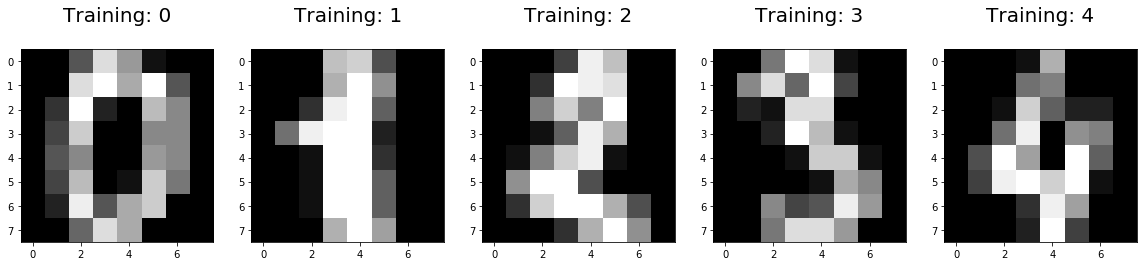

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digit_data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image[:64], (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digit_data, digits.target, test_size=0.25, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
np.min(digits.data.flatten())

0.0

In [13]:
logisticRegr = LogisticRegression()

In [14]:
logisticRegr.fit(x_train, y_train)

/home/kglin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kglin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [16]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [17]:
logisticRegr.intercept_

array([-0.02262176, -2.41798447, -0.02573874, -0.15670828,  0.01915467,
       -0.04661683, -0.06110564, -0.02042798, -2.60045239, -0.84797796])

In [18]:
arr_coef=np.round(logisticRegr.coef_*128)
bias_coef=np.round(logisticRegr.intercept_*128)

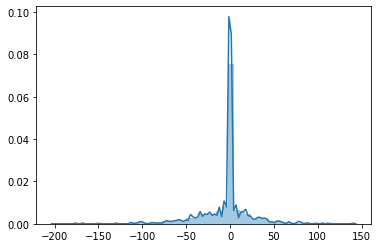

In [19]:
sns.distplot(arr_coef.flatten())

10 100 100 10
     17372     17305      1567     15679     16847     17476     14037     17587     18669     16840
     17181     18546     18463     14583     19846     18195     18007     16924       474     17521
     15361     17499      2212     16397     16453     17545     14728     17065     18631     16639
     17913     17875     17280     16075     19477     18470      1002     17391       203     13119
     18720     17759     17725     16723     18124     18043      1581     17677     19804     15714
     17352     19040     18434     17153     18405     17092     16296      1649     18303     18368
     15823       977     18757     17102     18305     15821     18743     16417     19445     15679
     18465     17799     18374     18093     16589     16761     15701     16595     19334       956
     16994     17080     17409     19442     16768     19046     18188     17152       421     17560
     18606     17501     19554     16204     17601      2229     17239     19

In [23]:
x_test[:100].shape

(100, 100)

In [24]:
arr_coef.T.shape

(100, 10)

In [25]:
bias_coef.shape

(10,)

In [26]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [ ]:
np.min(ans)

In [38]:
prime = 19963 
ans=gasp_dot(x_test[100:110],arr_coef.T)
ans_mod=np.mod(ans,prime)
ans_decode=ans_mod
ans_decode[ans_decode>(prime/2)]-=prime

10 100 100 10
     17556     16336     18271     17098     18303      1120     17584     17764     19457     17440
     18314     17537     15962     17387     19421      1135     16754     17242     17559     18962
     16562     18484      1304     16824     17136     16977     14796     19715     19106     17236
     17311     17741     14912     18217     16999       454       178     17390     18560     16636
     18203     17362     17792     19100     16554     18278     18231     17627     19646       621
      1594     17132     16780     15997     18131     17120     18037     16619     18558     16616
     19171     18200     17182     17053     17529     18138     16631       416     18239     18316
     16395      1552     19319     18566     16647     17378     18274     14628     18481     17620
     18819     16598     16958     14888      1602     14092     17608     18984     19746     14060
     17843       256     16980     13123     19073     18038     19070     18

In [39]:
y_pred = np.argmax(ans_decode,axis=-1)

In [40]:
accuracy_score(y_pred,y_test[100:110])

0.9